## Huffman Encoding

Problem: Give a sequence of characters, find an encoding for the characters that satisfies the **prefix constraint** and that minimizes the total number of bits needed to encode the text.

For the simplicity, the sequence of characters is assumed to be a sequence of English letters. Each of the 26 characters is represented by a unique string of bits, called the **encoding** of the character.

For example, in ASCII, all characters are presented by bit strings of size 7. A is represented by the bit string 1000001, B by 1000010, and so on.

The word 'AND' requires 21 bits. If we change the representation of A to, say 1001, we save 3 bits every time A appears. However, not every set of encoding is valid. There may be ambiguities. For example, if M is represented as 1001101, than we could not determine whether '1001' is A or is part of M. In general, the prefixes of an encoding of one character must **NOT** be equal to a complete encoding of another character. We call this constrain the **prefix constrain**.

Denote the characters by $C_1$, $C_1$, $\dots$, $C_n$, and denote their frequencies by $f_1$, $f_1$, $\dots$, $f_n$. Given an encoding $E$ in which a bit string $S_i$ of length $s_i$ represents $C_i$, the length of the file $F$ (a sequence of characters) compressed by using encoding $E$ is

$L(E, F) = \sum_{i=1}^{n} s_i \times f_i$

Our goal is to find an encoding $E$ that satisfies the prefix constrain and minimized $L(E, F)$.

Consider a binary tree in which each node has either two edges labeled by 1 and 0, or no edges (no child). The leaves in this tree corresponds to the character's encoding. The prefix constrain says that all characters must correspond to leaves.

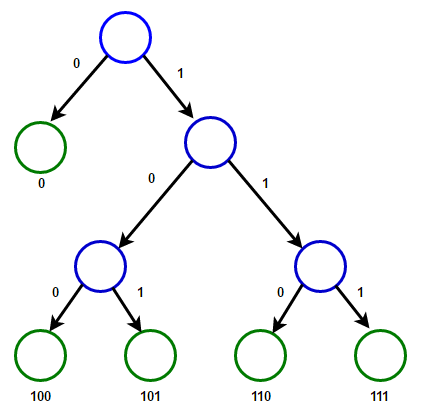

In [1]:
from IPython.display import Image
Image(filename='Huffman.png', width=400) 

Now, the algorithm is based on a reduction od a problem with $n$ characters to a problem with $n-1$ characters (the base case is trivial). Instead of eliminating one character (as we did before in other problem), we introduce a new 'artificially made' character in place of two existing characters.

Let $C_i$ and $C_j$ be two characters with minimal frequency. We claim that there exists a tree that minimizes $L(E, F)$ in which these characters correspond to leaves with the maximal distance from the root. Otherwise, if there is a character with higher frequency lower in the tree, it can be exchanged with $C_i$ or $C_j$ to decrease $L(E, F)$.

Since each node in the tree has either two children or no children, we can assume that $C_i$ and $C_j$ are together. We now replace $C_i$ and $C_j$ with a new character, called $C_{ij}$, whose frequency is the sum $f_i + f_j$.

The problem now has $n-1$ characters.

*Algorithm Huffman_Encoding (S, f);*

**Input:** $S$ (a string of characters), and $f$ (an array of frequencues).

**Output:** $T$ (the Huffman tree for $S$).


**begin**

    instert all characters into a heap H according to their frequencies;
    while H is not empty do
        if H contains only one character X then
            make X the root of T
        else
            pop two characters X and Y with lowest frequencies form H
            replace X and Y with a new character Z whose frequency is the sum of the frequencies of X and Y
            insert Z to H
            make X and Y children of Z in T {Z has no parent yet}
**end**

* insertions into a data set (heap)
* deletions of two characters
* addition of one character
* build the tree

Q: Big O?